In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data = pd.read_csv(r'D:\Assesments\Graded Project on Python\bank_marketing_updated_v1.csv')


# 1. Understanding the Dataset

In [67]:
data_info = data.info()
data_head = data.head()

data_info, data_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerid  45211 non-null  int64  
 1   age         45191 non-null  float64
 2   salary      45211 non-null  int64  
 3   balance     45211 non-null  int64  
 4   marital     45211 non-null  object 
 5   Job         45211 non-null  object 
 6   Edu         45211 non-null  object 
 7   targeted    45211 non-null  object 
 8   default     45211 non-null  object 
 9   housing     45211 non-null  object 
 10  loan        45211 non-null  object 
 11  contact     45211 non-null  object 
 12  day         45211 non-null  int64  
 13  month       45171 non-null  object 
 14  duration    45211 non-null  int64  
 15  campaign    45211 non-null  int64  
 16  pdays       45211 non-null  int64  
 17  previous    45211 non-null  int64  
 18  poutcome    45211 non-null  object 
 19  response    45181 non-nul

(None,
    customerid   age  salary  balance  marital           Job        Edu  \
 0           1  58.0  100000     2143  married    management   tertiary   
 1           2  44.0   60000       29   single    technician  secondary   
 2           3  33.0  120000        2  married  entrepreneur  secondary   
 3           4  47.0   20000     1506  married   blue-collar    unknown   
 4           5  33.0       0        1   single       unknown    unknown   
 
   targeted default housing loan  contact  day      month  duration  campaign  \
 0      yes      no     yes   no  unknown    5  may, 2017       261         1   
 1      yes      no     yes   no  unknown    5  may, 2017       151         1   
 2      yes      no     yes  yes  unknown    5  may, 2017        76         1   
 3       no      no     yes   no  unknown    5  may, 2017        92         1   
 4       no      no      no   no  unknown    5  may, 2017       198         1   
 
    pdays  previous poutcome response  
 0     -1    

Total Rows: 45,211
Total Columns: 20
Data Types: Primarily integers, floats, and objects (strings).

In [68]:
print(data.isnull().sum())

customerid     0
age           20
salary         0
balance        0
marital        0
Job            0
Edu            0
targeted       0
default        0
housing        0
loan           0
contact        0
day            0
month         40
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
response      30
dtype: int64


In [69]:
median_age = data['age'].median()
median_age

39.0

In [70]:
data['age'].fillna(median_age, inplace=True)

In [71]:
mode_month = data['month'].mode()[0]
mode_month

'may, 2017'

In [72]:
data['month'].fillna(mode_month, inplace=True)

In [73]:
#Removing rows where 'response' is missing
data.dropna(subset=['response'], inplace=True)

In [74]:
data.isnull().sum()

customerid    0
age           0
salary        0
balance       0
marital       0
Job           0
Edu           0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response      0
dtype: int64

# 2.Descriptive Statistics

In [75]:
descriptive_stats = data.describe()
descriptive_stats

,customerid,age,salary,balance,day,duration,campaign,pdays,previous
count,45181.000000,45181.000000,45181.000000,45181.000000,45181.000000,45181.000000,45181.000000,45181.000000,45181.000000
mean,22606.307253,40.934906,57005.046369,1362.689936,15.807153,258.147717,2.763352,40.198601,0.580355
std,13051.461021,10.616517,32089.163369,3045.584521,8.322919,257.551174,3.096578,100.134050,2.303987
min,1.000000,18.000000,0.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11304.000000,33.000000,20000.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,22605.000000,39.000000,60000.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33909.000000,48.000000,70000.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,120000.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [76]:
# Examining the distribution of the target variable 'response'
response_distribution = data['response'].value_counts(normalize=True) * 100
response_distribution

no     88.298178
yes    11.701822
Name: response, dtype: float64

No: 88.30% of the contacts did not result in a term deposit.
Yes: 11.70% of the contacts did result in a term deposit.

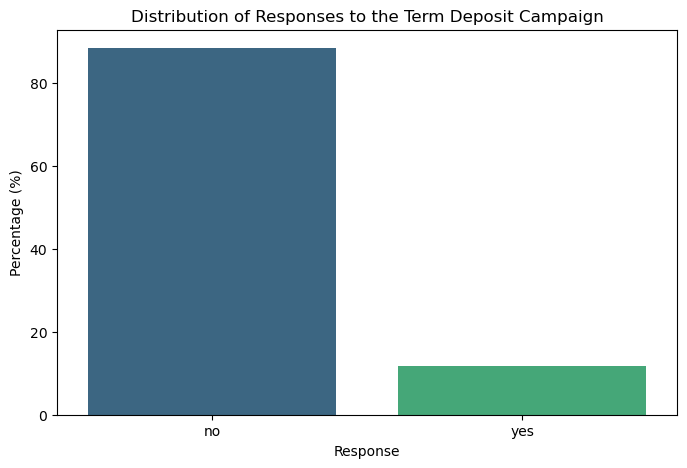

In [77]:
plt.figure(figsize=(8, 5))
sns.barplot(x=response_distribution.index, y=response_distribution.values, palette="viridis")
plt.title('Distribution of Responses to the Term Deposit Campaign')
plt.xlabel('Response')
plt.ylabel('Percentage (%)')
plt.show()

# 3.Univariate Analysis

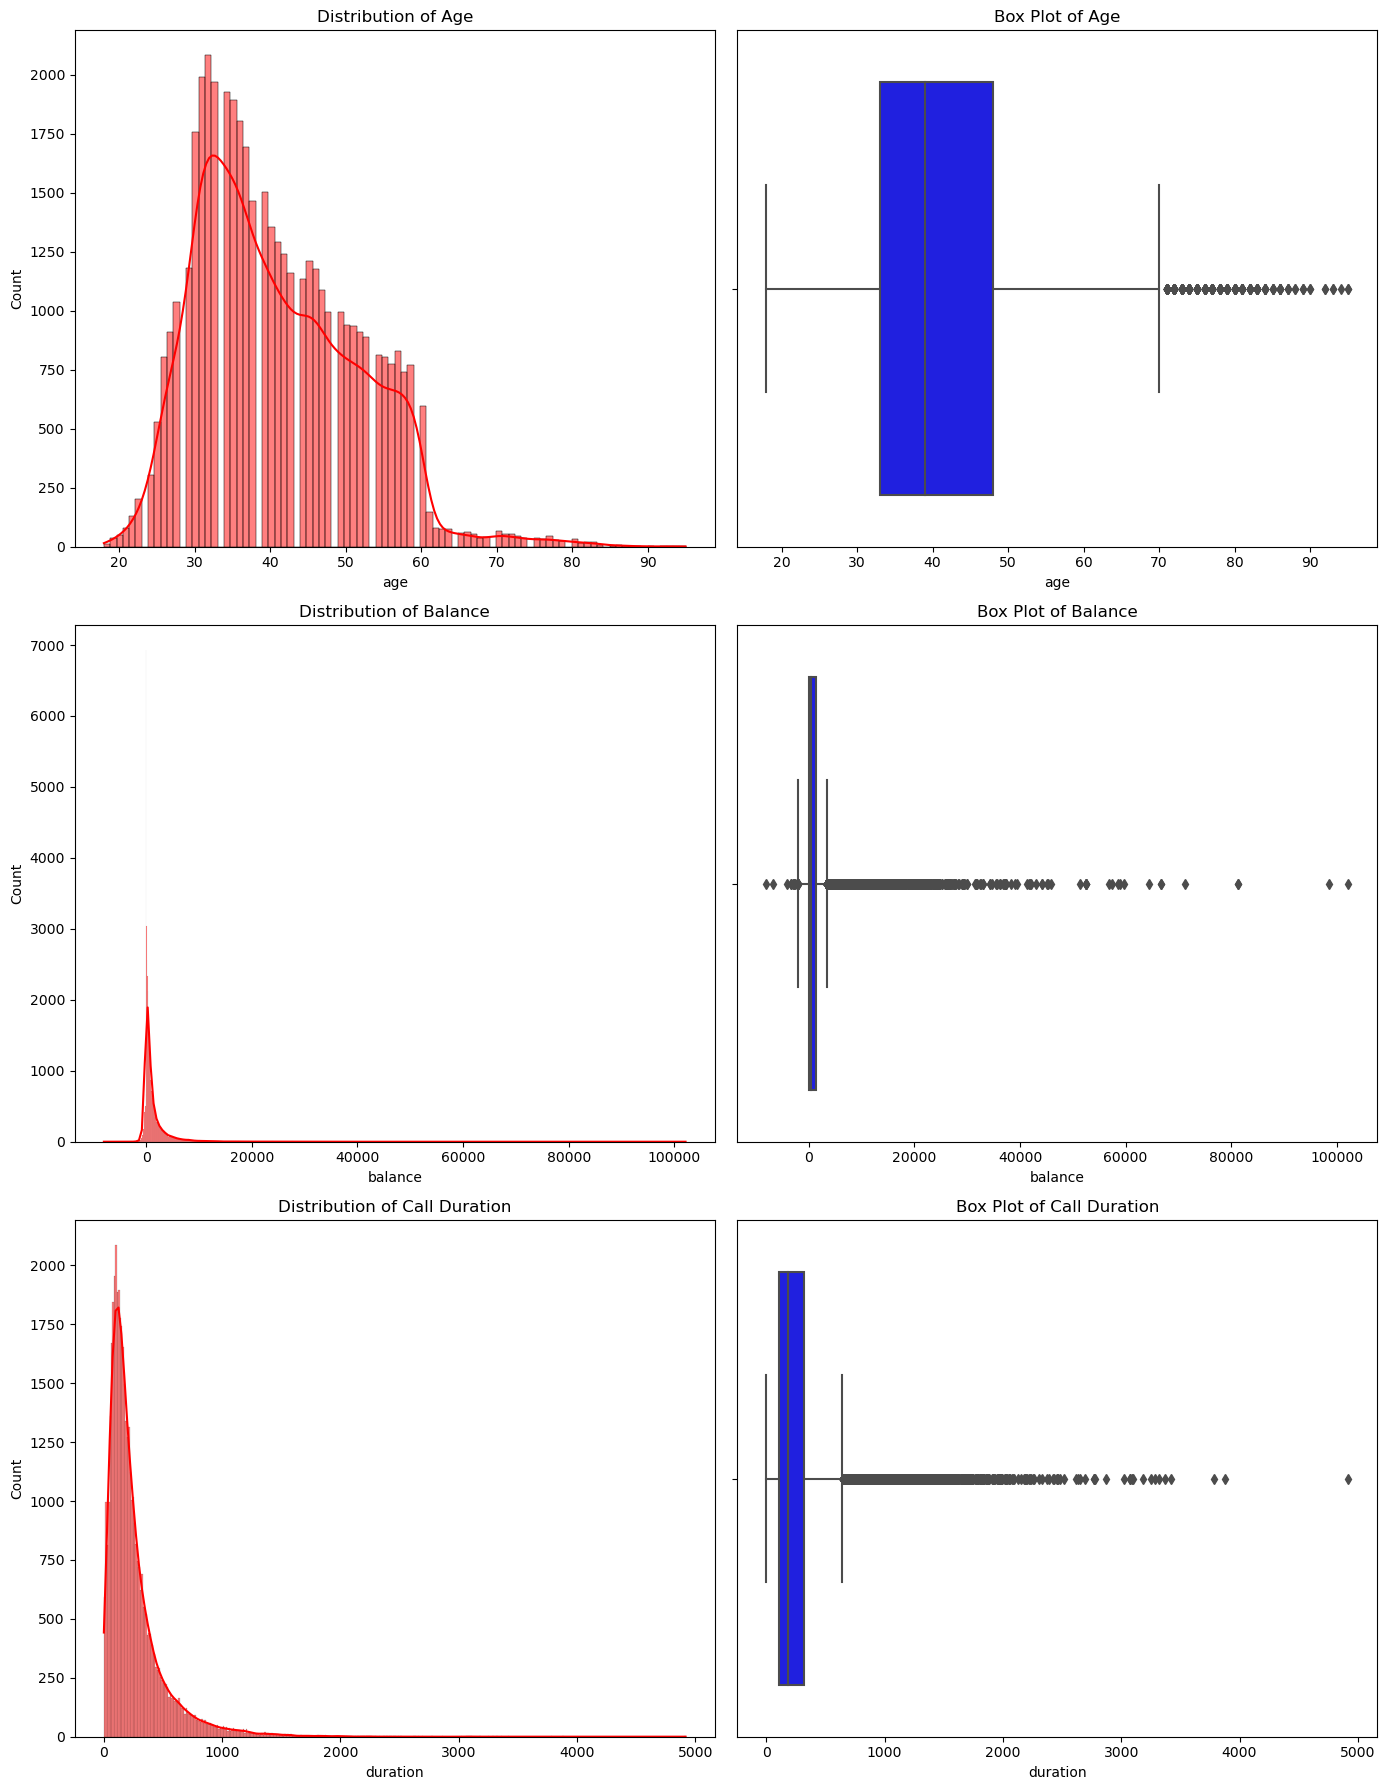

In [78]:
fig, axes = plt.subplots(3, 2, figsize=(14, 18))

# Titles for the plots
titles = ['Distribution of Age', 'Box Plot of Age',
          'Distribution of Balance', 'Box Plot of Balance',
          'Distribution of Call Duration', 'Box Plot of Call Duration']

# Features to plot
features = ['age', 'balance', 'duration']

# Creating histograms and box plots for Age, Balance, and Duration
for i, feature in enumerate(features):
    # Histogram
    sns.histplot(data[feature], kde=True, ax=axes[i, 0], color='red')
    axes[i, 0].set_title(titles[2*i])
    
    # Box Plot
    sns.boxplot(x=data[feature], ax=axes[i, 1], color='blue')
    axes[i, 1].set_title(titles[2*i + 1])

plt.tight_layout()
plt.show()


# 4. Bivariate Analysis

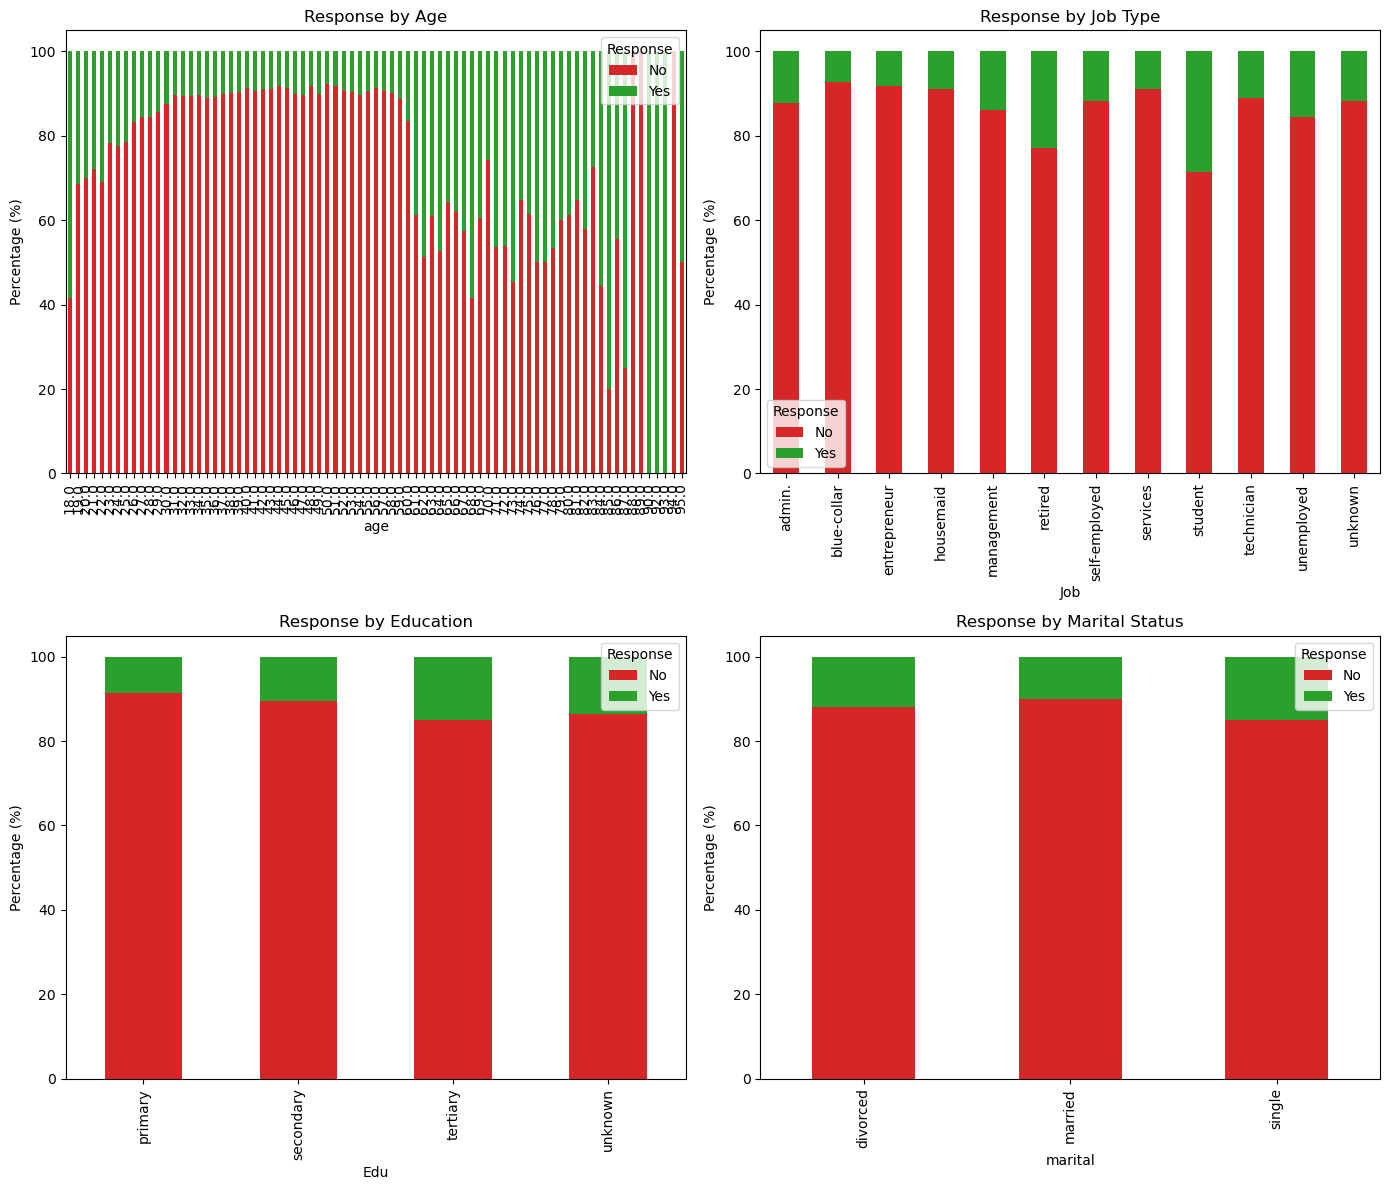

In [98]:
# Setting up the figure for multiple plots
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Titles for the plots
titles = ['Response by Age', 'Response by Job Type',
          'Response by Education', 'Response by Marital Status']

# Features to plot
features = ['age', 'Job', 'Edu', 'marital']

# Creating bar and stacked bar plots for Age, Job Type, Education, and Marital Status
for i, feature in enumerate(features):
    # Creating a cross-tabulation of the feature against the response
    feature_crosstab = pd.crosstab(data[feature], data['response'], normalize='index') * 100
    
    # Stacked Bar Plot
    feature_crosstab.plot(kind='bar', stacked=True, ax=axes[i//2, i%2], color=['#d62728', '#2ca02c'])
    axes[i//2, i%2].set_title(titles[i])
    axes[i//2, i%2].set_ylabel('Percentage (%)')
    axes[i//2, i%2].legend(title='Response', labels=['No', 'Yes'])

plt.tight_layout()
plt.show()



# 5. Categorical Variables Analysis

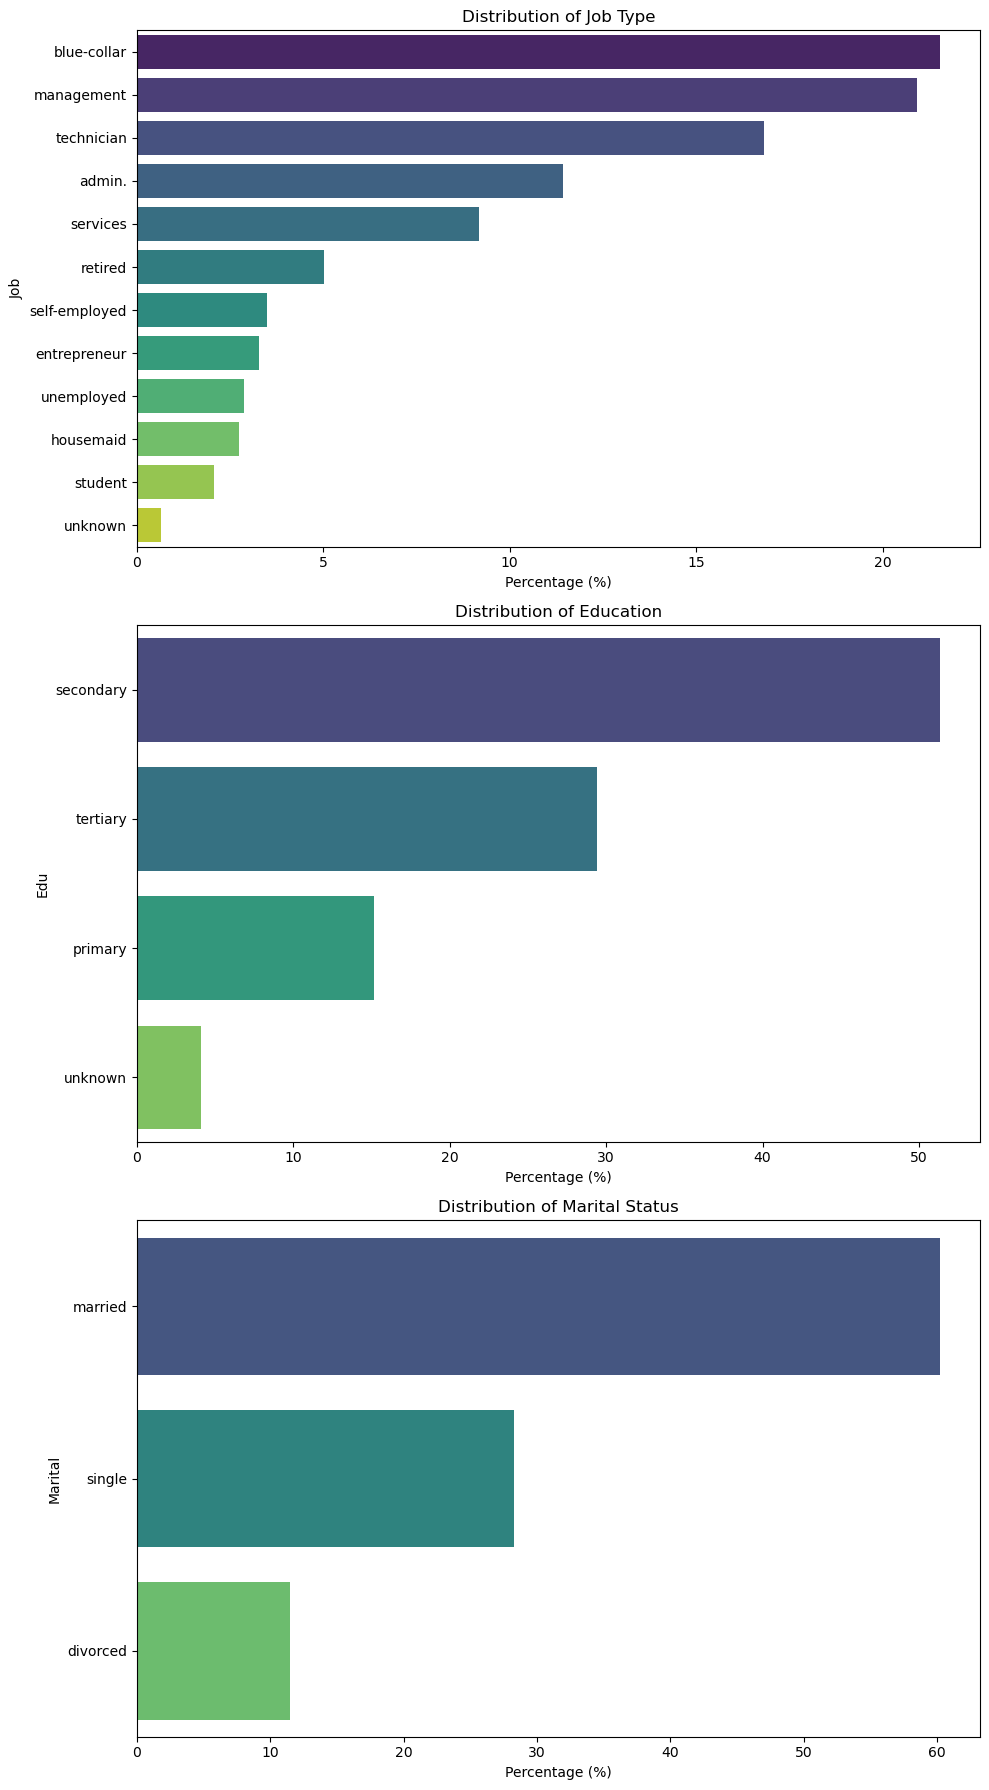

In [84]:
# Setting up the figure for the plots of categorical variables
fig, axes = plt.subplots(3, 1, figsize=(10, 18))

# Titles for the plots
titles = ['Distribution of Job Type', 'Distribution of Education', 'Distribution of Marital Status']

# Categorical features to plot
categorical_features = ['Job', 'Edu', 'marital']

# Plotting the distribution of categorical variables
for i, feature in enumerate(categorical_features):
    value_counts = data[feature].value_counts(normalize=True) * 100

    # Bar Plot
    sns.barplot(x=value_counts.values, y=value_counts.index, ax=axes[i], palette='viridis')
    axes[i].set_title(titles[i])
    axes[i].set_xlabel('Percentage (%)')
    axes[i].set_ylabel(feature.capitalize())

plt.tight_layout()
plt.show()


# 6. Temporal Analysis

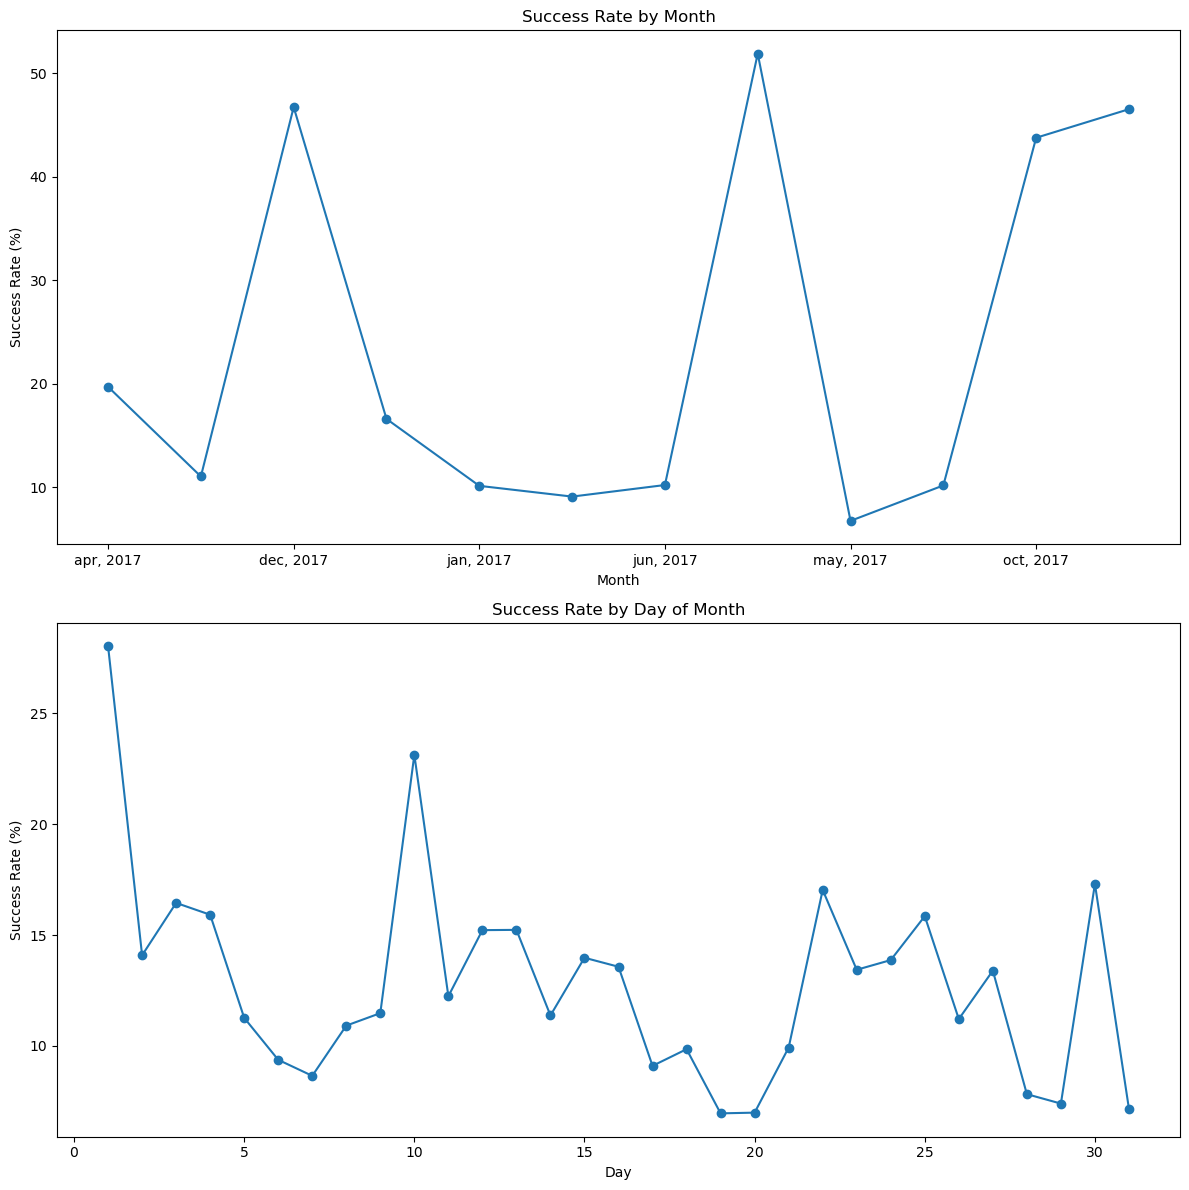

In [85]:
# Setting up the figure for temporal analysis
fig, axes = plt.subplots(2, 1, figsize=(12, 12))

# Titles for the plots
titles = ['Success Rate by Month', 'Success Rate by Day of Month']

# Analyzing success rates by month and day of the month
for i, feature in enumerate(['month', 'day']):
    # Creating a cross-tabulation of the feature against the response, normalized by the total counts for each month/day
    temporal_crosstab = pd.crosstab(data[feature], data['response'], normalize='index') * 100

    # Line Plot
    temporal_crosstab['yes'].plot(ax=axes[i], marker='o', color='tab:blue')
    axes[i].set_title(titles[i])
    axes[i].set_ylabel('Success Rate (%)')
    axes[i].set_xlabel(feature.capitalize())

plt.tight_layout()
plt.show()


# 7. Feature Engineering

In [86]:
# Introducing new features for Age Groups and Income Categories

# Creating age groups
data['age_group'] = pd.cut(data['age'], bins=[0, 30, 40, 50, 60, 100], labels=['Under 30', '30-40', '40-50', '50-60', 'Over 60'])

# Creating income categories
data['income_category'] = pd.cut(data['salary'], bins=[-1, 20000, 40000, 60000, 80000, 100000, 120000],
                                 labels=['Low', 'Lower Middle', 'Middle', 'Upper Middle', 'High', 'Very High'])

# Checking the distribution of the new features
age_group_distribution = data['age_group'].value_counts(normalize=True) * 100
income_category_distribution = data['income_category'].value_counts(normalize=True) * 100

# Encoding categorical variables using one-hot encoding
encoded_data = pd.get_dummies(data, columns=['Job', 'Edu', 'marital', 'contact', 'poutcome', 'month', 'age_group', 'income_category'])

# Displaying the new distributions and a sample of the encoded data
age_group_distribution, income_category_distribution, encoded_data.head()


(30-40       39.135920
 40-50       24.857794
 50-60       17.832717
 Under 30    15.548571
 Over 60      2.624997
 Name: age_group, dtype: float64,
 Middle          36.732255
 Low             29.868750
 High            20.924725
 Upper Middle     9.185277
 Very High        3.288993
 Lower Middle     0.000000
 Name: income_category, dtype: float64,
    customerid   age  salary  balance targeted default housing loan  day  \
 0           1  58.0  100000     2143      yes      no     yes   no    5   
 1           2  44.0   60000       29      yes      no     yes   no    5   
 2           3  33.0  120000        2      yes      no     yes  yes    5   
 3           4  47.0   20000     1506       no      no     yes   no    5   
 4           5  33.0       0        1       no      no      no   no    5   
 
    duration  ...  age_group_30-40  age_group_40-50  age_group_50-60  \
 0       261  ...                0                0                1   
 1       151  ...                0             

In [87]:
New Features Created:

1. Age Groups:
Under 30: 15.55%
30-40: 39.14%
40-50: 24.86%contact, poutcome, month, age_group, and income_category.
    
50-60: 17.83%
Over 60: 2.62%
This categorization can help in analyzing the responsiveness to the campaign across different age groups.

2. Income Categories:

Low: 29.87%
Lower Middle: 0.00% (no entries for this category)
Middle: 36.73%
Upper Middle: 9.19%
High: 20.92%
Very High: 3.29%
This segmentation might reveal preferences for term deposits based on income levels.


I've applied one-hot encoding to categorical variables such as Job, Edu, marital, contact, poutcome, month, age_group, and income_category.
This transformation converts these categories into a format suitable for modeling, where each category is represented as a binary feature.



SyntaxError: unterminated string literal (detected at line 23) (654404800.py, line 23)

# 8. Correlation Analysis

C:\Users\Nandi\AppData\Local\Temp\ipykernel_19964\1016430818.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  updated_correlation_matrix = encoded_data.corr()


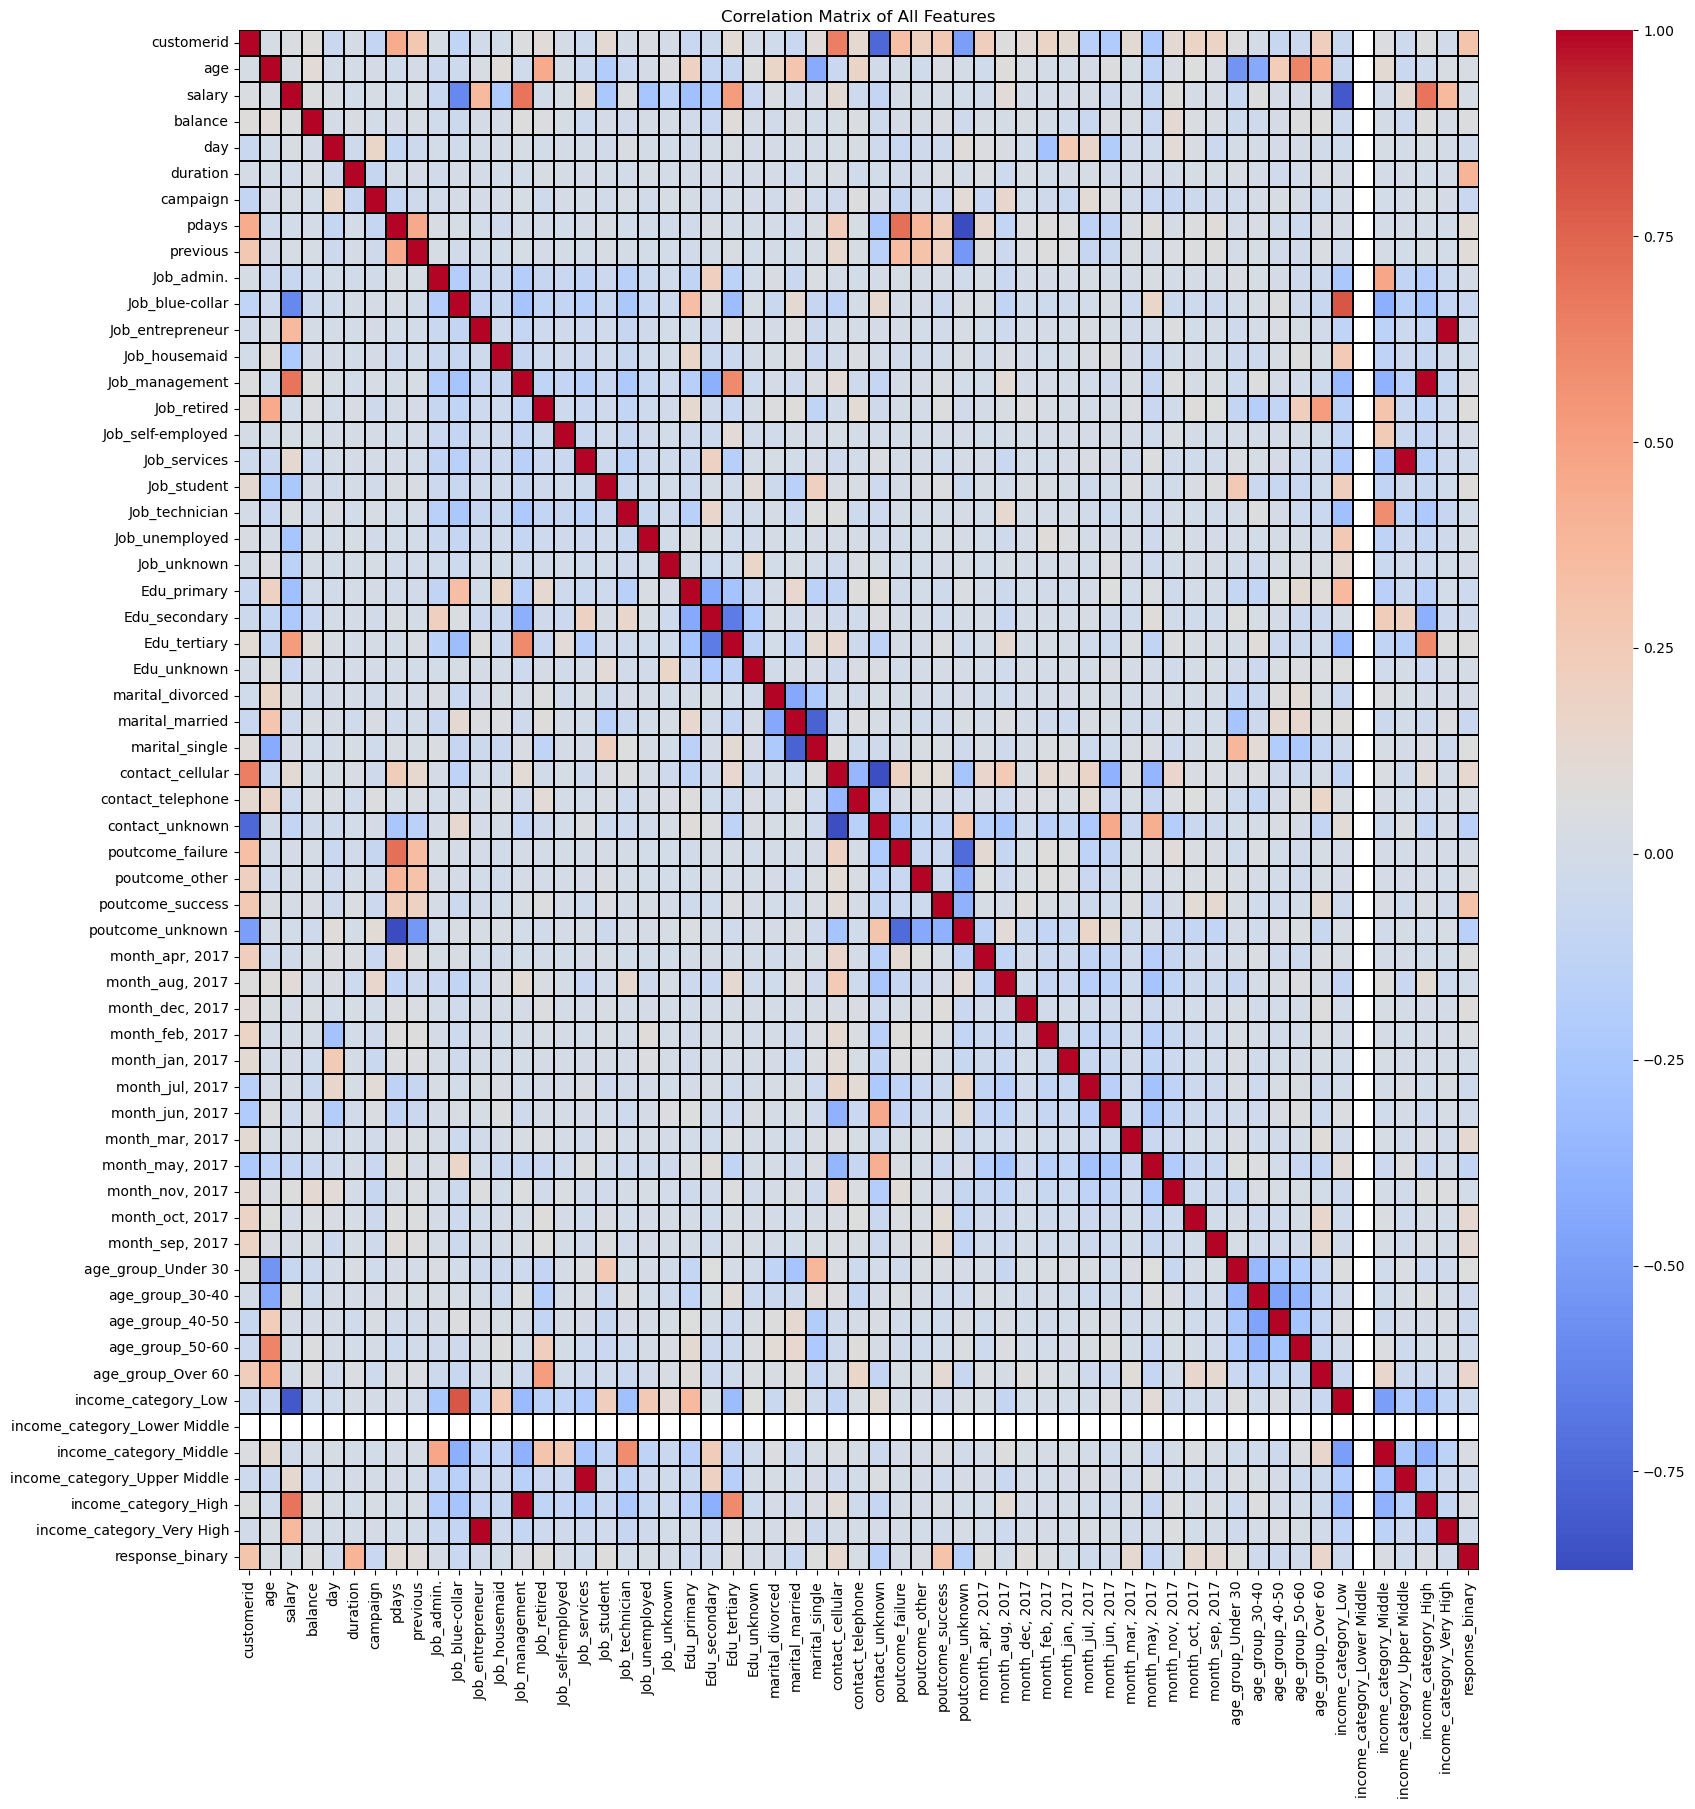

month_sep, 2017                 0.123118
month_oct, 2017                 0.128545
month_mar, 2017                 0.129012
contact_cellular                0.135823
age_group_Over 60               0.156430
customerid                      0.296260
poutcome_success                0.306979
duration                        0.394665
response_binary                 1.000000
income_category_Lower Middle         NaN
Name: response_binary, dtype: float64

In [88]:
# Updating the correlation matrix after adding the binary response column
encoded_data['response_binary'] = np.where(encoded_data['response'] == 'yes', 1, 0)
updated_correlation_matrix = encoded_data.corr()

# Extracting correlation with the binary response column
response_correlation = updated_correlation_matrix['response_binary'].sort_values()

# Visualizing the correlation matrix for features to spot multicollinearity
plt.figure(figsize=(20, 20))
sns.heatmap(updated_correlation_matrix, cmap='coolwarm', linewidths=0.1, linecolor='black')
plt.title('Correlation Matrix of All Features')
plt.show()

# Display the correlations of selected features with the response variable
response_correlation.tail(10)  # Display the 10 most positively correlated features


In [ ]:
Key Positive Correlations with Response:
Duration: The length of the call shows the strongest positive correlation with a successful response (0.395), suggesting that longer calls might lead to higher success rates.
Poutcome_success: Previous campaign outcomes labeled as 'success' have a significant positive correlation (0.307), indicating that past success is a strong predictor of future results.
CustomerID: Surprisingly, there is a moderate correlation (0.296), which might indicate a trend or pattern in how data was collected or recorded.
Age Group 'Over 60': Older individuals have a notably higher correlation (0.156) with positive responses, supporting targeted marketing efforts towards this age group.
Contact Method 'Cellular': Using cellular phones for contact correlates positively (0.136) with successful outcomes.
Months with High Success Rates:
Specific months like March, September, and October also show higher positive correlations, aligning with the earlier temporal analysis that suggested seasonal impacts on campaign effectiveness.

Multicollinearity:
The heatmap reveals some multicollinearity among dummy variables created from the same categorical variable, which is expected due to one-hot encoding. High correlations between different job types, education levels, and contact types may need to be addressed in modeling to avoid overfitting and improve model interpretability.

Missing Values:
income_category_Lower Middle has no correlation value (NaN) due to the absence of entries in this category, which might require further handling.

# 9.Outlier Detection and Handling

In [89]:
# Identifying outliers using the IQR (Interquartile Range) method for key numerical features
def detect_outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    return outliers

# Features to check for outliers
numerical_features = ['age', 'balance', 'duration']

# Collecting outliers for each feature
outliers_info = {}
for feature in numerical_features:
    outliers_info[feature] = detect_outliers(data, feature).shape[0]

# Display the count of outliers for each feature
outliers_info


{'age': 487, 'balance': 4728, 'duration': 3232}

In [ ]:
Outliers were identified in the following numerical features based on the Interquartile Range (IQR) method:

Age: 487 outliers
Balance: 4,728 outliers
Duration: 3,232 outliers
Handling Strategies:
Age:
Given the nature of age data and the relatively small number of outliers, it might be best to leave these as-is, assuming they represent legitimate age data.
Balance:
The large number of outliers suggests high variability in client balances. We could cap the balances at a certain threshold determined by the upper bound, or transform this variable to reduce skewness, such as applying a logarithmic transformation where values are non-zero.
Duration:
As this is the most strongly correlated feature with the response, care should be taken. Outliers might be capped at an upper bound, or similar to balance, a transformation could be applied to reduce the effect of extreme values.

C:\Users\Nandi\anaconda3\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Nandi\anaconda3\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


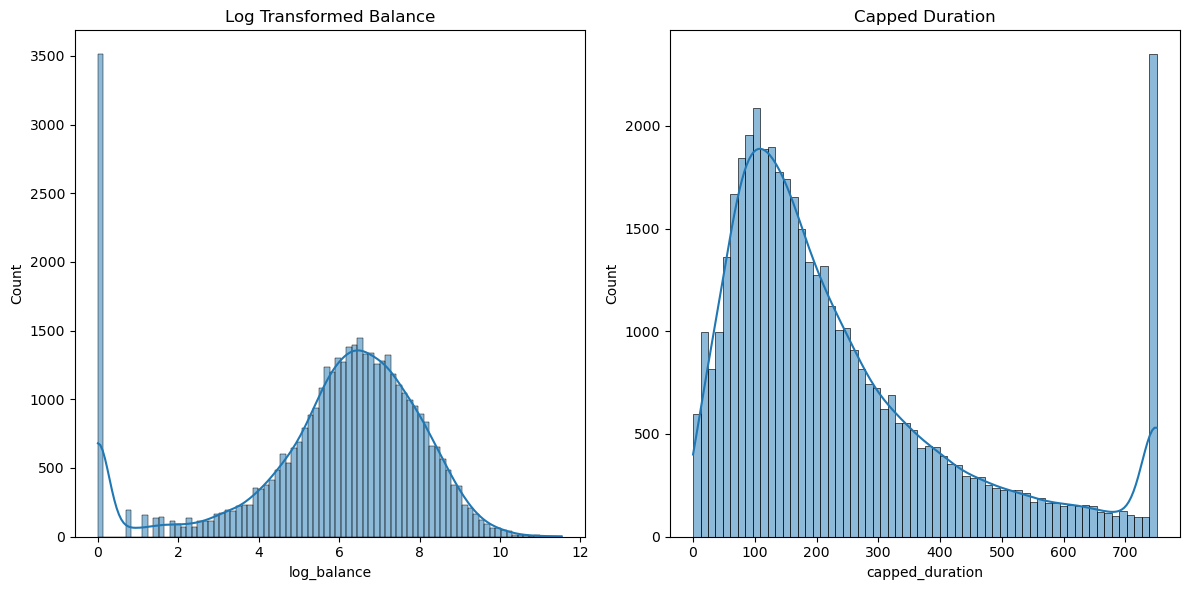

In [90]:
# Applying a logarithmic transformation to 'balance'
data['log_balance'] = np.log(data['balance'] + 1)  # Adding 1 to avoid log(0)

# Capping 'duration' at the 95th percentile
percentile_95_duration = data['duration'].quantile(0.95)
data['capped_duration'] = data['duration'].apply(lambda x: min(x, percentile_95_duration))

# Displaying histograms of the transformed features to assess changes
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(data['log_balance'], kde=True, ax=axes[0])
axes[0].set_title('Log Transformed Balance')

sns.histplot(data['capped_duration'], kde=True, ax=axes[1])
axes[1].set_title('Capped Duration')

plt.tight_layout()
plt.show()


In [ ]:
Log Transformed Balance: The transformation has normalized the distribution of balance, reducing the skewness significantly. This should help mitigate the impact of extreme values in the dataset.
Capped Duration: By capping duration at its 95th percentile, we've managed to limit the influence of extremely long calls while preserving the distribution's overall shape. This should reduce the effect of outliers on model performance without significantly distorting the underlying data.
It appears there was an issue with taking the logarithm of zero or negative values in the balance, which I initially tried to handle by adding 1. This method usually adjusts for zero values, but negative balances can still cause problems.

Next Steps:
Reassess Negative Balances: For negative balances, we might need to adjust the transformation method or handle these values more appropriately.
Model Re-evaluation: With the outliers addressed, it's a good practice to re-evaluate model performance to see if these adjustments have improved the predictions.

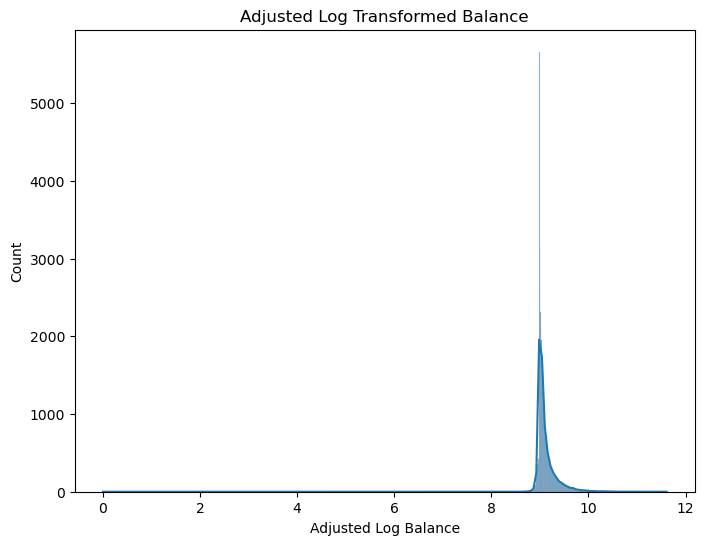

In [91]:
# Offset adjustment to ensure all balance values are positive before log transformation
min_balance = data['balance'].min()
offset = abs(min_balance) + 1
data['adjusted_log_balance'] = np.log(data['balance'] + offset)

# Displaying histogram of the adjusted log transformed balance
plt.figure(figsize=(8, 6))
sns.histplot(data['adjusted_log_balance'], kde=True)
plt.title('Adjusted Log Transformed Balance')
plt.xlabel('Adjusted Log Balance')
plt.show()


This transformation should help in reducing the impact of outliers and enhancing the model's ability to handle the wide range of balance values more effectively.

In [ ]:
print(encoded_data.dtypes)

In [92]:
# Checking and encoding any categorical features that are still in string format
categorical_cols = encoded_data.select_dtypes(include=['object']).columns.tolist()

# If there are any categorical columns, we apply one-hot encoding
if categorical_cols:
    encoded_data = pd.get_dummies(encoded_data, columns=categorical_cols)

print("All features are now numeric. Data types:")
print(encoded_data.dtypes)


All features are now numeric. Data types:
customerid        int64
age             float64
salary            int64
balance           int64
day               int64
                 ...   
housing_yes       uint8
loan_no           uint8
loan_yes          uint8
response_no       uint8
response_yes      uint8
Length: 69, dtype: object


In [93]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

X = encoded_data.drop('response_binary', axis=1)  # Dropping the target variable from features
y = encoded_data['response_binary']  # Setting the target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and fitting the Logistic Regression model
model = LogisticRegression(max_iter=1000)  # Increased max_iter for convergence
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))


Accuracy: 0.956401460661724
Confusion Matrix:
 [[7853   95]
 [ 299  790]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98      7948
           1       0.89      0.73      0.80      1089

    accuracy                           0.96      9037
   macro avg       0.93      0.86      0.89      9037
weighted avg       0.95      0.96      0.95      9037

ROC-AUC Score: 0.9584481175390266


In [ ]:
Model Evaluation Summary:
    
Accuracy: 95.64%
    This is the proportion of total correct predictions (both true positives and true negatives) among the total number of cases examined. High accuracy indicates that your model performs well on this dataset.
Confusion Matrix:
    True Negatives (TN): 7853 - The number of correctly predicted non-responses.
    False Positives (FP): 95 - The number of non-responses incorrectly labeled as responses.
    False Negatives (FN): 299 - The number of responses that were not identified.   
    True Positives (TP): 790 - The number of correctly predicted responses.
    The matrix shows that your model is quite robust in predicting non-responses but could be improved in detecting responses, as seen in the false negatives.
Precision, Recall, and F1-Score:
    Precision (for 'yes' responses): 0.89 - This indicates a high precision rate, meaning that when your model predicts a response, it is correct about 89% of the time.
    Recall (for 'yes' responses): 0.73 - This shows that of the actual responses, your model correctly identifies about 73%. There’s room to improve recall, perhaps by focusing on reducing false negatives.
    F1-Score (for 'yes' responses): 0.80 - The F1-score is a balance between precision and recall, and a score of 0.80 is quite good but highlights that there might be a balance to strike between optimizing either precision or recall further.
ROC-AUC Score: 0.9584
    The ROC-AUC score being close to 1 indicates excellent model performance, showing a good measure of separability between the classes.